In [9]:
import pandas as pd

# Substitute the path_to_file content by the path to your shopping-data.csv file 
path_to_file = "E:/assignment/assignment3/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv"
customer_data = pd.read_csv(path_to_file)

In [10]:
customer_data.shape

(200, 5)

In [11]:
customer_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
customer_data.head() 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
customer_data['Genre'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Genre, dtype: float64

In [16]:
intervals = [15, 20, 30, 40, 50, 60, 70]
col = customer_data['Age']
customer_data['Age Groups'] = pd.cut(x=col, bins=intervals)

# To be able to look at the result stored in the variable
customer_data['Age Groups'] 

0      (15, 20]
1      (20, 30]
2      (15, 20]
3      (20, 30]
4      (30, 40]
         ...   
195    (30, 40]
196    (40, 50]
197    (30, 40]
198    (30, 40]
199    (20, 30]
Name: Age Groups, Length: 200, dtype: category
Categories (6, interval[int64, right]): [(15, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [17]:
customer_data.groupby('Age Groups')['Age Groups'].count()

Age Groups
(15, 20]    17
(20, 30]    45
(30, 40]    60
(40, 50]    38
(50, 60]    23
(60, 70]    17
Name: Age Groups, dtype: int64

In [18]:
customer_data_oh = pd.get_dummies(customer_data)
# Display the one-hot encoded dataframe
customer_data_oh 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,"Age Groups_(15, 20]","Age Groups_(20, 30]","Age Groups_(30, 40]","Age Groups_(40, 50]","Age Groups_(50, 60]","Age Groups_(60, 70]"
0,1,19,15,39,0,1,1,0,0,0,0,0
1,2,21,15,81,0,1,0,1,0,0,0,0
2,3,20,16,6,1,0,1,0,0,0,0,0
3,4,23,16,77,1,0,0,1,0,0,0,0
4,5,31,17,40,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,0,0,1,0,0,0
196,197,45,126,28,1,0,0,0,0,1,0,0
197,198,32,126,74,0,1,0,0,1,0,0,0
198,199,32,137,18,0,1,0,0,1,0,0,0


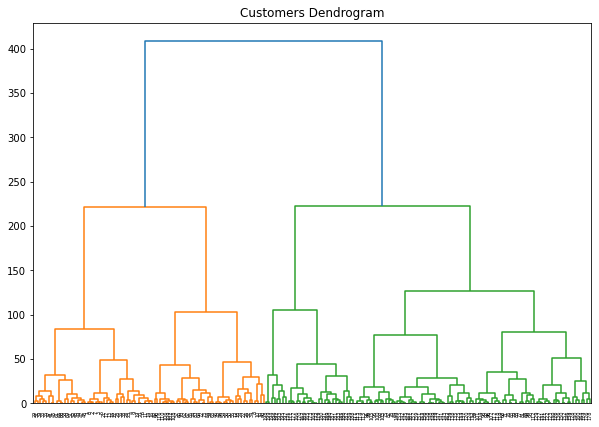

In [19]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage ='ward')

In [21]:
y_hc = hc.fit_predict(X)

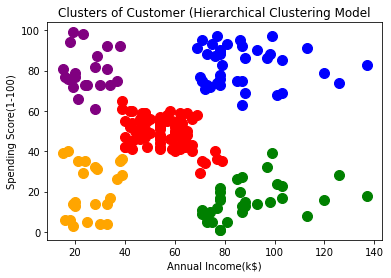

In [22]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='green', label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='red', label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='blue', label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='purple', label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='orange', label='Cluster 5')
plt.title('Clusters of Customer (Hierarchical Clustering Model')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

# Text analysis using topic modeling algorithms

In [23]:
import pandas as pd
import os

In [25]:
papers  = pd.read_csv("E:/assignment/assignment3/papers.csv")


In [26]:
#papers = pd.read_csv('papers.csv')
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [27]:
#Cleaning
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
5076,2014,Distributed Bayesian Posterior Sampling via Mo...,We propose a distributed Markov chain Monte Ca...,Distributed Bayesian Posterior Sampling via\nM...
5575,2016,Learning shape correspondence with anisotropic...,Convolutional neural networks have achieved ex...,Learning shape correspondence with\nanisotropi...
2772,2008,Dependence of Orientation Tuning on Recurrent ...,One major role of primary visual cortex (V1) i...,Dependence of Orientation Tuning on Recurrent\...
2221,2006,Stratification Learning: Detecting Mixed Densi...,Abstract Missing,Stratification Learning: Detecting Mixed Densi...
2580,1990,VLSI Implementations of Learning and Memory Sy...,Abstract Missing,VLSI Implementations of Learning\nand Memory S...


In [28]:
import re

#remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]','',x))

In [29]:
#convert to lower case and print first rows
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
papers['paper_text_processed'].head()

5076    distributed bayesian posterior sampling via\nm...
5575    learning shape correspondence with\nanisotropi...
2772    dependence of orientation tuning on recurrent\...
2221    stratification learning: detecting mixed densi...
2580    vlsi implementations of learning\nand memory s...
Name: paper_text_processed, dtype: object

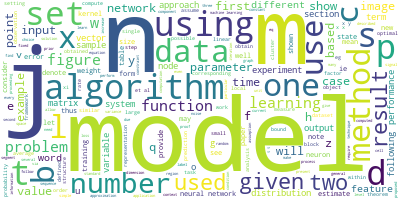

In [30]:
#Exploratory Analysis:
# To verify the preprocessing we use a word cloud 
from wordcloud import WordCloud
long_string = ','.join(list(papers['paper_text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [31]:
#Prepare text for LDA
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kushala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [33]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

In [34]:
# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['distributed', 'bayesian', 'posterior', 'sampling', 'via', 'moment', 'sharing', 'minjie', 'xu', 'balaji', 'yee', 'whye', 'teh', 'jun', 'zhu', 'bo', 'zhang', 'state', 'key', 'lab', 'intelligent', 'technology', 'systems', 'tsinghua', 'national', 'tnlist', 'lab', 'department', 'computer', 'science']


In [35]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 5), (3, 7), (4, 1), (5, 1), (6, 3), (7, 2), (8, 1), (9, 2), (10, 1), (11, 9), (12, 1), (13, 1), (14, 1), (15, 2), (16, 4), (17, 1), (18, 1), (19, 1), (20, 4), (21, 1), (22, 2), (23, 1), (24, 1), (25, 4), (26, 2), (27, 1), (28, 2), (29, 1)]


In [36]:
#LDA Model Training
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.005*"learning" + 0.005*"data" + 0.005*"model" + 0.004*"set" + '
  '0.004*"algorithm" + 0.004*"using" + 0.004*"one" + 0.004*"number" + '
  '0.003*"function" + 0.003*"used"'),
 (1,
  '0.008*"learning" + 0.006*"data" + 0.005*"using" + 0.004*"set" + '
  '0.004*"algorithm" + 0.004*"one" + 0.004*"model" + 0.003*"figure" + '
  '0.003*"matrix" + 0.003*"time"'),
 (2,
  '0.006*"data" + 0.005*"set" + 0.005*"learning" + 0.004*"algorithm" + '
  '0.004*"using" + 0.004*"model" + 0.003*"number" + 0.003*"two" + 0.003*"time" '
  '+ 0.003*"one"'),
 (3,
  '0.005*"learning" + 0.005*"model" + 0.005*"data" + 0.004*"set" + '
  '0.004*"function" + 0.004*"one" + 0.003*"neural" + 0.003*"time" + '
  '0.003*"algorithm" + 0.003*"figure"'),
 (4,
  '0.008*"data" + 0.006*"learning" + 0.005*"algorithm" + 0.004*"using" + '
  '0.004*"model" + 0.004*"set" + 0.003*"one" + 0.003*"time" + 0.003*"input" + '
  '0.003*"models"'),
 (5,
  '0.007*"learning" + 0.006*"data" + 0.005*"model" + 0.004*"set" + '
  '0.004*"using